In [1]:
from dataset_handling import Dataset, plot_label_distribution, plot_history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = Dataset('../dataset/winequalityN.csv', data_augmentation_noise=0.15)
X_train, X_test, Y_train, Y_test = dataset.split()

def remap(y):
    if y < 6:
        return [1, 0, 0]
    elif y == 6:
        return [0, 1, 0]
    else:
        return [0, 0, 1]
    
Y_train = np.array([remap(y) for y in Y_train])
Y_test = np.array([remap(y) for y in Y_test])

# Normalizing the data
averages = [np.mean([x[i] for x in X_train]) for i in range(len(X_train[0]))]
std_devs = [np.std([x[i] for x in X_train]) for i in range(len(X_train[0]))]
X_train = np.array([(x - averages) / std_devs for x in X_train])
X_test = np.array([(x - averages) / std_devs for x in X_test])

# Plotting the data
x = [0, 1, 2]
y_tr = [len([y for y in Y_train if np.argmax(y) == n]) for n in x]
y_te = [len([y for y in Y_test if np.argmax(y) == n]) for n in x]
sizes = [y1 + y2 for y1, y2 in zip(y_tr, y_te)]

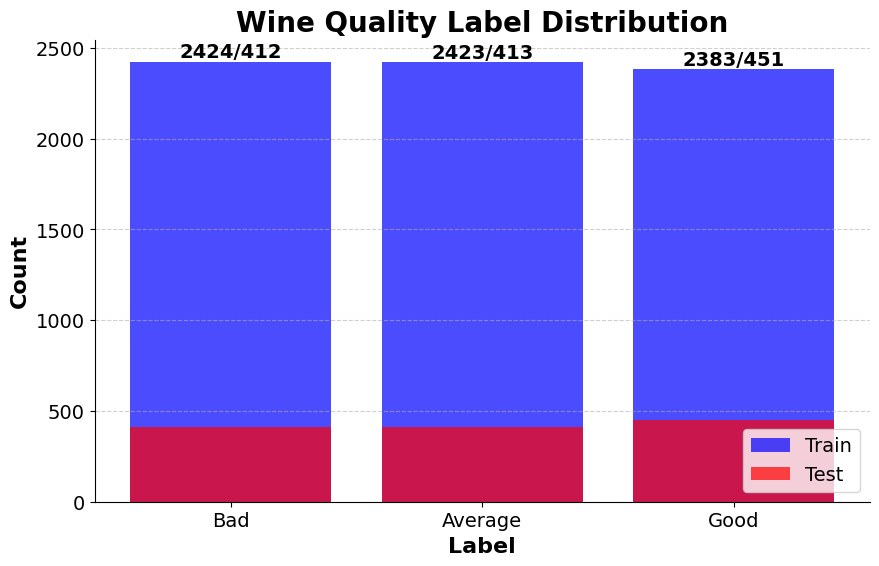

In [3]:
plot_label_distribution(['Bad', 'Average', 'Good'], y_tr, y_te)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 3)                 48        
                                                                 
Total params: 623 (2.43 KB)
Trainable params: 623 (2.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


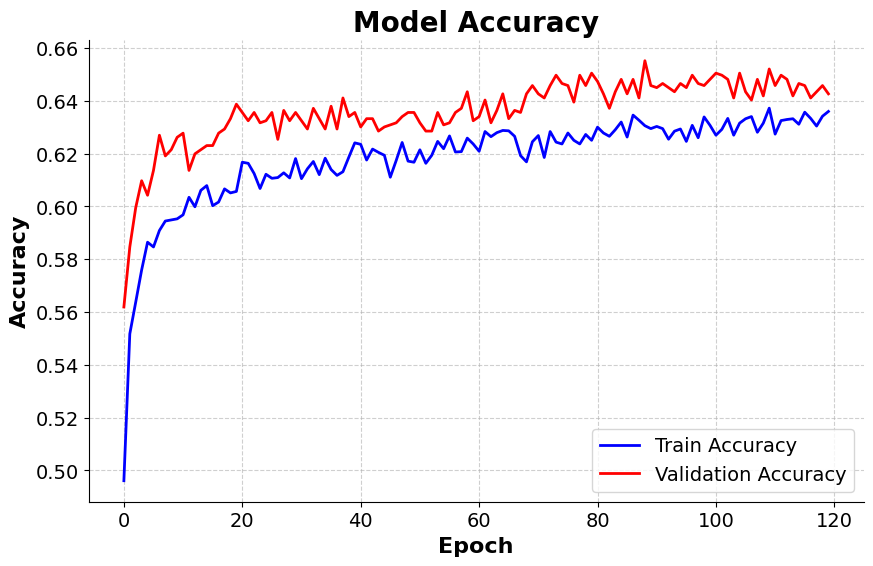

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=120, validation_data=(X_test, Y_test), verbose=0)

plot_history(history)

In [6]:
# Save the model to H5 file
model.save('../models/wine_quality_classifier.h5')

# Save X_test and Y_test to numpy arrays
np.save('../dataset/wine_quality_X_test.npy', X_test)
np.save('../dataset/wine_quality_Y_test.npy', Y_test)